## Univariate Linear Regression Model for United States Carbon Emission

## Understanding the Data

**`co2_emission.csv`** contains model-specific estimated CO2 emission ratings for each country.

-   **Entity** e.g. Africa
-   **Code** e.g. GBR
-   **Year** e.g. 2014
-   **Annual CO₂ emissions** e.g. 36.2b metric tons (tonnes)

In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Creating the dataframe

In [163]:
df = pd.read_csv("co2_emission.csv")
df.head(10)

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
5,Afghanistan,AFG,1954,106256.0
6,Afghanistan,AFG,1955,153888.0
7,Afghanistan,AFG,1956,183200.0
8,Afghanistan,AFG,1957,293120.0
9,Afghanistan,AFG,1958,329760.0


### Modifying dataframe

In [164]:
cdf = df[['Entity', 'Year', 'Annual CO₂ emissions (tonnes )']]
cdf = cdf[cdf['Entity'] == 'United States']
cdf.columns = ['Country', 'Year', 'Emissions']
cdf = cdf[cdf['Emissions'] > 0]
cdf.head(10)

,Country,Year,Emissions
19710,United States,1800,252816.0
19711,United States,1801,267472.0
19712,United States,1802,289456.0
19713,United States,1803,296784.0
19714,United States,1804,333424.0
19715,United States,1805,340752.0
19716,United States,1806,333424.0
19717,United States,1807,377392.0
19718,United States,1808,392048.0
19719,United States,1809,403040.0


## Create Testing and Training datasets

In [165]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

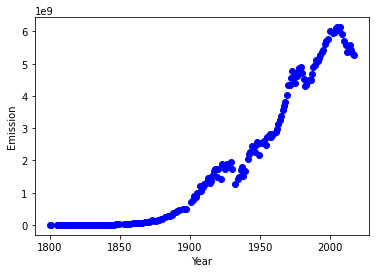

In [166]:
plt.scatter(train.Year, train.Emissions,  color='blue')
plt.xlabel("Year")
plt.ylabel("Emission")
plt.show()

In [167]:
x_train = np.asanyarray(train['Year'])
y_train = np.asanyarray(train['Emissions'])

### Fitting the Exponential Model
We create a function that the model will fit parameters on 

In [168]:
coefs = np.polyfit(x_train, y_train, 2)

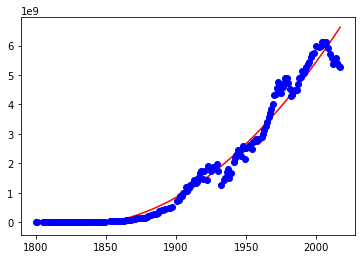

In [169]:
plt.plot(x_train, np.polyval(coefs, x_train), color="red")
plt.plot(x_train, y_train, "o", color="blue")

### Examining the Fit
A polynomial to the 2nd degree fits most of the curve relatively well however the drop down after the 2000s is unaccounted for thus, this model is accurate pre 2000s. Although it is nowhere near guarenteed that the United States would continue this down trend of carbon emissions it's a feasible assumption to make. 

In [170]:
coefs = np.polyfit(x_train, y_train, 6)

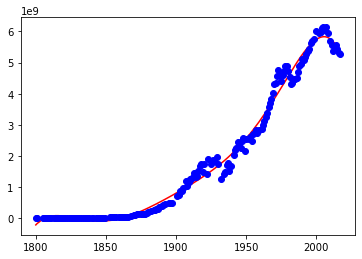

In [171]:
plt.plot(x_train, np.polyval(coefs, x_train), color="red")
plt.plot(x_train, y_train, "o", color="blue")

### Error Analysis

1803
85568064.0
296784.0


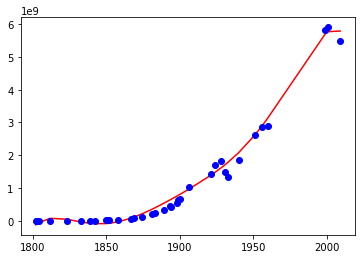

In [187]:
x_test = np.asanyarray(test['Year'])
y_test = np.asanyarray(test['Emissions'])
y_predict = np.polyval(coefs, x_test)
plt.plot(x_test, y_predict, color="red")
plt.plot(x_test, y_test, "o", color="blue")

print(np.absolute())